<h1 style="text-align:center">Build Non-Linear Models Part 1</h1>
<h2 style="text-align:center">Applied Question 8</h2>
<p style="text-align:center">Robert Evans</p>
<p style="text-align:center">School of Technology & Engineering, National University</p>
<p style="text-align:center">DDS-8555: Predictive Analysis</p>
<p style="text-align:center">Dr. Mohammad Yavarimanesh</p>
<p style="text-align:center">January 26, 2025</p>

## Part A

In [2]:
import numpy as np

In [3]:
# set seed for repeatability
np.random.seed(42)

In [4]:
# Generate predictor X and noise vector epsilon
n = 100
X = np.random.normal(size=n)
epsilon = np.random.normal(size=n)

## Part B

In [7]:
# Define coefficients
beta_0 = 2.0
beta_1 = 1.5
beta_2 = -0.5
beta_3 = 0.3

In [8]:
# Generate response vector Y
Y =  beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

## Part C

In [11]:
import statsmodels.api as sm
import pandas as pd

In [16]:
# Create a DataFrame with predictors X, X^2, ..., X^10
data = np.column_stack([X**i for i in range(1, 11)])
data = sm.add_constant(data)  # Add constant term for intercept

In [19]:
# Perform forward stepwise selection
def forward_stepwise_selection(data, Y):
    initial_features = []
    remaining_features = list(range(1, data.shape[1]))
    selected_features = initial_features[:]
    current_score, best_new_score = float('inf'), float('inf')
    
    while remaining_features and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining_features:
            features_to_test = selected_features + [candidate]
            model = sm.OLS(Y, data[:, features_to_test]).fit()
            score = model.aic
            scores_with_candidates.append((score, candidate))
        
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        
        if current_score > best_new_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score
    
    return selected_features

selected_features = forward_stepwise_selection(data, Y)
print("Selected features:", selected_features)

# Fit the final model with selected features and print the summary
final_model = sm.OLS(Y, data[:, selected_features]).fit()
print(final_model.summary())

Selected features: [1, 3, 2, 4, 6, 8, 10]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              47.61
Date:                Sun, 26 Jan 2025   Prob (F-statistic):                    4.79e-28
Time:                        20:15:59   Log-Likelihood:                         -165.57
No. Observations:                 100   AIC:                                      345.1
Df Residuals:                      93   BIC:                                      363.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]

## Part D

In [20]:
# Create a DataFrame with predictors X, X^2, ..., X^10
data = np.column_stack([X**i for i in range(1, 11)])
data = sm.add_constant(data)  # Add constant term for intercept

# Perform backward stepwise selection
def backward_stepwise_selection(data, Y):
    initial_features = list(range(data.shape[1]))
    selected_features = initial_features[:]
    current_score, best_new_score = float('inf'), float('inf')
    
    while selected_features and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in selected_features:
            features_to_test = list(selected_features)
            features_to_test.remove(candidate)
            model = sm.OLS(Y, data[:, features_to_test]).fit()
            score = model.aic
            scores_with_candidates.append((score, candidate))
        
        scores_with_candidates.sort()
        best_new_score, worst_candidate = scores_with_candidates[0]
        
        if current_score > best_new_score:
            selected_features.remove(worst_candidate)
            current_score = best_new_score
    
    return selected_features

selected_features = backward_stepwise_selection(data, Y)
print("Selected features:", selected_features)

# Fit the final model with selected features and print the summary
final_model = sm.OLS(Y, data[:, selected_features]).fit()
print(final_model.summary())

Selected features: [0, 1, 3, 6, 8, 10]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           5.06e-38
Time:                        20:22:30   Log-Likelihood:                -130.78
No. Observations:                 100   AIC:                             273.6
Df Residuals:                      94   BIC:                             289.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

## Part E

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV

C:\Users\Robert Evans\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08822156126132086, tolerance: 0.052091778534987976
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Robert Evans\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33542782630956935, tolerance: 0.052091778534987976
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Robert Evans\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19132293181820614, tolerance: 0.052091778534987976
  model = cd_fast.enet_coordinate_descent_gram(
C

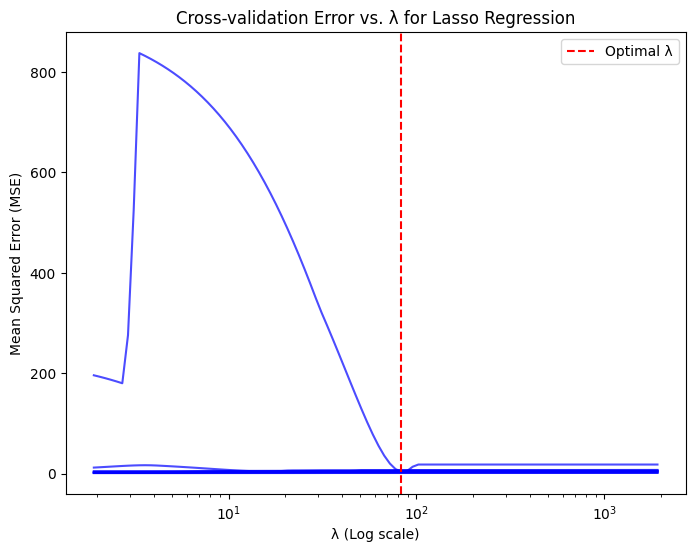

Optimal λ: 83.06482967366632

Lasso Coefficient Estimates:
X^1: 0.0
X^2: -0.0
X^3: 0.0
X^4: -0.0
X^5: 0.0
X^6: -0.0
X^7: 0.0
X^8: -0.0
X^9: 0.00013926095594957226
X^10: -0.0007430208943168665


In [30]:

# Assuming X and Y are your predictors and response variable
# Generate polynomial features for X^1, X^2, ..., X^10
X_poly = np.column_stack([X**i for i in range(1, 11)])

# Fit a Lasso model using cross-validation to select optimal lambda (alpha)
lasso = LassoCV(cv=10)
lasso.fit(X_poly, Y)

# Plot cross-validation error as a function of lambda (alpha)
plt.figure(figsize=(8, 6))
plt.plot(lasso.alphas_, lasso.mse_path_, linestyle='-', color='blue', alpha=0.7)
plt.axvline(x=lasso.alpha_, color='red', linestyle='--', label='Optimal λ')
plt.xscale('log')
plt.xlabel('λ (Log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-validation Error vs. λ for Lasso Regression')
plt.legend()
plt.show()

# Print the optimal lambda value
print(f"Optimal λ: {lasso.alpha_}")
# Report the resulting coefficient estimates
print("\nLasso Coefficient Estimates:")
for i, coef in enumerate(lasso.coef_):
    print(f"X^{i+1}: {coef}")